In [52]:
from langgraph.graph import StateGraph ,END,START
from typing import TypedDict,Literal


In [53]:
class QuadState(TypedDict):

    a:int
    b:int
    c:int

    equation: str
    discriminant:float
    result:str



In [54]:
def show_equation(state: QuadState) -> QuadState:
    state["equation"] = f"{state['a']}x^2 + {state['b']}y + {state['c']}"
    return state


In [55]:
def calculate_discriminant(state: QuadState):

    discriminant=state["b"]**2 - (4 *state["a"]*state["c"])

    return {'discriminant' :discriminant}

In [56]:
def real_root(state : QuadState):
    root1=(-state["b"] + state["discriminant"]**0.5)/(2*state["a"])
    root2=(-state["b"] - state["discriminant"]**0.5)/(2*state["a"])

    result= f'The roots are {root1} and {root2}'

    return {"result":result}

In [57]:
def repeated_root(state : QuadState):
    root=(-state["b"] )/(2*state["a"])


    result= f'Only repeating roots is {root} '

    return {"result":result}

In [58]:
def no_root(state :QuadState):
    result="No real roots"

    return {"result":result}

In [59]:
## Condition Check 

def check_condition(state : QuadState) -> Literal["real_root", "repeated_root", "no_root"]:
    if state['discriminant'] > 0 :
        return "real_root"
    elif state["discriminant"] == 0:
        return "repeated_root"
    else:
        return "no_root"

In [60]:
graph=StateGraph(QuadState)

graph.add_node("show_equation",show_equation)
graph.add_node('calculate_discriminant',calculate_discriminant)
graph.add_node("real_root",real_root)
graph.add_node("repeated_root",repeated_root)
graph.add_node("no_root",no_root)


graph.add_edge(START,"show_equation")
graph.add_edge("show_equation","calculate_discriminant")

graph.add_conditional_edges("calculate_discriminant",check_condition)

graph.add_edge("real_root",END)
graph.add_edge("repeated_root",END)
graph.add_edge("no_root",END)



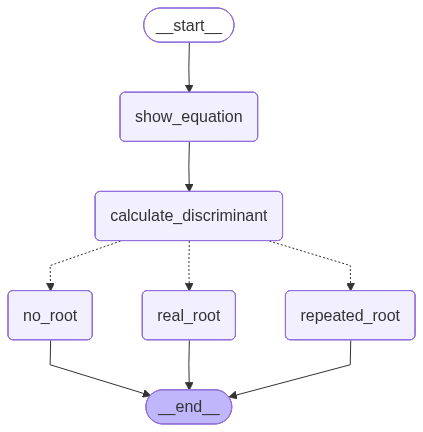

In [62]:
workflow=graph.compile()
workflow

In [67]:
inital_state={
    'a':4,
    'b':-3,
    'c':-5

}

In [68]:
workflow.invoke(inital_state)

{'a': 4,
 'b': -3,
 'c': -5,
 'equation': '4x^2 + -3y + -5',
 'discriminant': 89,
 'result': 'The roots are 1.5542476415070754 and -0.8042476415070754'}